# Importing the important libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud

In [2]:
# Importing nltk libraries
import re
import string
import missingno
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist



from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

# Loading the Dataset:

In [3]:
rr=pd.read_csv('Review_Rating_Datafile.csv')

In [4]:
rr.head(10)

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Just started system. It's getting over heated...,Just started system. It's getting over heated...,2.0 out of 5 stars
1,1,"Fast, Lightweight, Great Screen.. But very fli...",- Build quality is bad. Cheapest quality plast...,2.0 out of 5 stars
2,2,Warranty only for 9 months,While my experience with the laptop has been g...,2.0 out of 5 stars
3,3,Vendor review - not good experience,I would like to let you all know the 2 problem...,2.0 out of 5 stars
4,4,Diapointed with the laptop.,The camera doesn't work.. the keyboard is of v...,2.0 out of 5 stars
5,5,Came without manual and dirty screen,Received this laptop without manual and incorr...,2.0 out of 5 stars
6,6,cheap quality at high price loose fittings,&nbsp;Features are good but quality is very ch...,2.0 out of 5 stars
7,7,Less Warranty and less Processors speed,"Product come with lower processor speed, As pe...",2.0 out of 5 stars
8,8,Superb laptop but issue with this warranty ☹️☹️,"very fast and smooth laptop, but i purchase th...",2.0 out of 5 stars
9,9,over heating,over heating and fan noise screen size is too ...,2.0 out of 5 stars


In [5]:
print("We have {} Rows and {} Columns in our dataframe :)".format(rr.shape[0], rr.shape[1]))

We have 25029 Rows and 4 Columns in our dataframe :)


In [6]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25029 entries, 0 to 25028
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    25029 non-null  int64 
 1   Review_title  24954 non-null  object
 2   Review_text   24945 non-null  object
 3   Ratings       24954 non-null  object
dtypes: int64(1), object(3)
memory usage: 782.3+ KB


In [7]:
rr.isna().sum()

Unnamed: 0       0
Review_title    75
Review_text     84
Ratings         75
dtype: int64

In [8]:
rr.drop(['Unnamed: 0'],axis=1,inplace=True)

<AxesSubplot:>

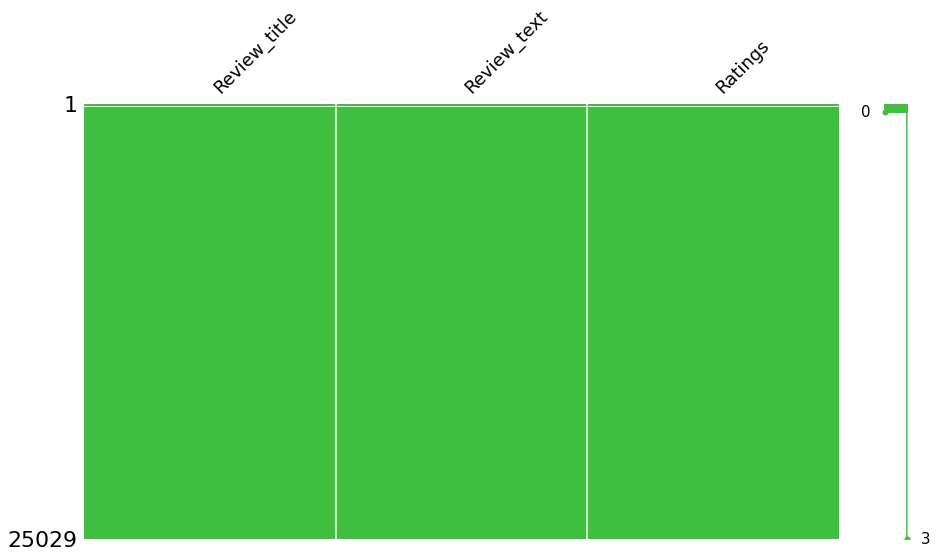

In [9]:
missingno.matrix(rr, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [10]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(rr.shape[0], rr.shape[1]))
rr.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(rr.shape[0], rr.shape[1]))

We have 25029 Rows and 3 Columns in our dataframe before removing NaN
We have 24945 Rows and 3 Columns in our dataframe after removing NaN


In [11]:
rr.isna().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

In [12]:
rr['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '3', '1',
       '2'], dtype=object)

In [13]:
rr['Ratings'] = rr['Ratings'].replace('1.0 out of 5 stars',1)
rr['Ratings'] = rr['Ratings'].replace('2.0 out of 5 stars',2)
rr['Ratings'] = rr['Ratings'].replace('3.0 out of 5 stars',3)
rr['Ratings'] = rr['Ratings'].replace('4.0 out of 5 stars',4)
rr['Ratings'] = rr['Ratings'].replace('5.0 out of 5 stars',5)
rr['Ratings'] = rr['Ratings'].astype('int')
rr['Ratings'].unique()

array([2, 3, 1, 5, 4])

In [14]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
rr['Review'] = rr['Review_title'].map(str)+' '+rr['Review_text']
rr

,Review_title,Review_text,Ratings,Review
0,Just started system. It's getting over heated...,Just started system. It's getting over heated...,2,Just started system. It's getting over heated...
1,"Fast, Lightweight, Great Screen.. But very fli...",- Build quality is bad. Cheapest quality plast...,2,"Fast, Lightweight, Great Screen.. But very fli..."
2,Warranty only for 9 months,While my experience with the laptop has been g...,2,Warranty only for 9 months While my experience...
3,Vendor review - not good experience,I would like to let you all know the 2 problem...,2,Vendor review - not good experience I would li...
4,Diapointed with the laptop.,The camera doesn't work.. the keyboard is of v...,2,Diapointed with the laptop. The camera doesn't...
...,...,...,...,...
25024,Wonderful,It's a very good products\nDelivery is fast,5,Wonderful It's a very good products\nDelivery ...
25025,Brilliant,Nice love you❤😘🤟 beautiful and very very much😊...,5,Brilliant Nice love you❤😘🤟 beautiful and very ...
25026,Just okay,Nice watch.,3,Just okay Nice watch.
25027,Worth every penny,Nice Product,5,Worth every penny Nice Product


In [15]:
rr['Review'][0:10]

0    Just started system.  It's getting over heated...
1    Fast, Lightweight, Great Screen.. But very fli...
2    Warranty only for 9 months While my experience...
3    Vendor review - not good experience I would li...
4    Diapointed with the laptop. The camera doesn't...
5    Came without manual and dirty screen Received ...
6    cheap quality at high price loose fittings &nb...
7    Less Warranty and less Processors speed Produc...
8    Superb laptop but issue with this warranty ☹️☹...
9    over heating over heating and fan noise screen...
Name: Review, dtype: object

In [16]:
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
rr['Review'] = rr['Review'].apply(lambda x : x.lower())
rr['Review'] = rr['Review'].apply(lambda x : decontracted(x))



# Removing punctuations from the review
rr['Review'] = rr['Review'].str.replace('[^\w\s]','')
rr['Review'] = rr['Review'].str.replace('\n',' ')



# Removing all the stopwords
stop = stopwords.words('english')
rr['Review'] = rr['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
rr['Review'][0:10]

0    started system getting heated fan making lot n...
1    fast lightweight great screen flimsy build bui...
2    warranty 9 months experience laptop good issue...
3    vendor review good experience would like let k...
4    diapointed laptop camera work keyboard low qua...
5    came without manual dirty screen received lapt...
6    cheap quality high price loose fittings nbspfe...
7    less warranty less processors speed product co...
8    superb laptop issue warranty fast smooth lapto...
9    heating heating fan noise screen size small su...
Name: Review, dtype: object

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

rr['Review'] = rr['Review'].apply(lambda x : lemmatize_sentence(x))

In [20]:
rr['Review'][0:10]

0    start system get heat fan make lot noise start...
1    fast lightweight great screen flimsy build bui...
2    warranty 9 month experience laptop good issue ...
3    vendor review good experience would like let k...
4    diapointed laptop camera work keyboard low qua...
5    come without manual dirty screen receive lapto...
6    cheap quality high price loose fitting nbspfea...
7    less warranty less processor speed product com...
8    superb laptop issue warranty fast smooth lapto...
9    heat heat fan noise screen size small suitable...
Name: Review, dtype: object

In [21]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

rr['Review'] = rr['Review'].apply(lambda x : scrub_words(x))

In [22]:
rr['Review'][0:10]

0    start system get heat fan make lot noise start...
1    fast lightweight great screen flimsy build bui...
2    warranty  month experience laptop good issue n...
3    vendor review good experience would like let k...
4    diapointed laptop camera work keyboard low qua...
5    come without manual dirty screen receive lapto...
6    cheap quality high price loose fitting nbspfea...
7    less warranty less processor speed product com...
8    superb laptop issue warranty fast smooth lapto...
9    heat heat fan noise screen size small suitable...
Name: Review, dtype: object

In [23]:
# Creating column for word counts in the review text
rr['Review_WC'] = rr['Review'].apply(lambda x: len(str(x).split(' ')))
rr[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,27,start system get heat fan make lot noise start...
1,67,fast lightweight great screen flimsy build bui...
2,37,warranty month experience laptop good issue n...
3,39,vendor review good experience would like let k...
4,26,diapointed laptop camera work keyboard low qua...
5,25,come without manual dirty screen receive lapto...
6,33,cheap quality high price loose fitting nbspfea...
7,31,less warranty less processor speed product com...
8,14,superb laptop issue warranty fast smooth lapto...
9,12,heat heat fan noise screen size small suitable...


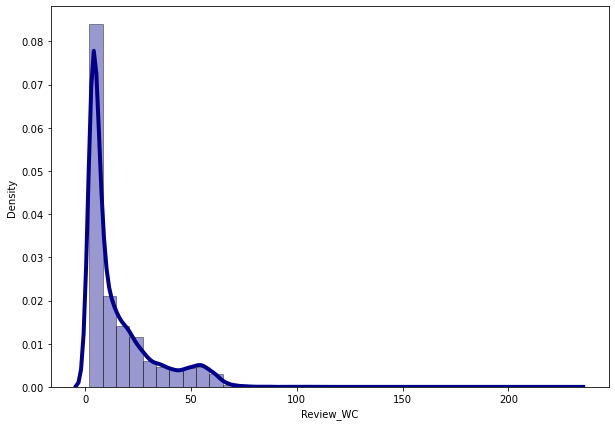

In [24]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(rr['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


In [25]:
# Creating column for character counts in the review text
rr['Review_CC'] = rr['Review'].str.len()
rr[['Review_CC','Review']].head(10)

,Review_CC,Review
0,148,start system get heat fan make lot noise start...
1,427,fast lightweight great screen flimsy build bui...
2,238,warranty month experience laptop good issue n...
3,235,vendor review good experience would like let k...
4,166,diapointed laptop camera work keyboard low qua...
5,165,come without manual dirty screen receive lapto...
6,197,cheap quality high price loose fitting nbspfea...
7,189,less warranty less processor speed product com...
8,89,superb laptop issue warranty fast smooth lapto...
9,70,heat heat fan noise screen size small suitable...


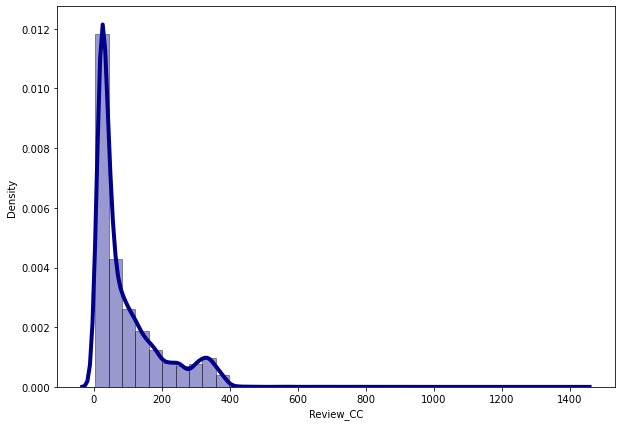

In [26]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(rr['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [27]:
# Applying zscore to remove outliers
z_score = zscore(rr[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
rr = rr[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(rr.shape[0], rr.shape[1]))

We have 24741 Rows and 6 Columns in our dataframe after removing outliers


In [28]:
import pandas_profiling

In [29]:
pandas_profiling.ProfileReport(rr)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

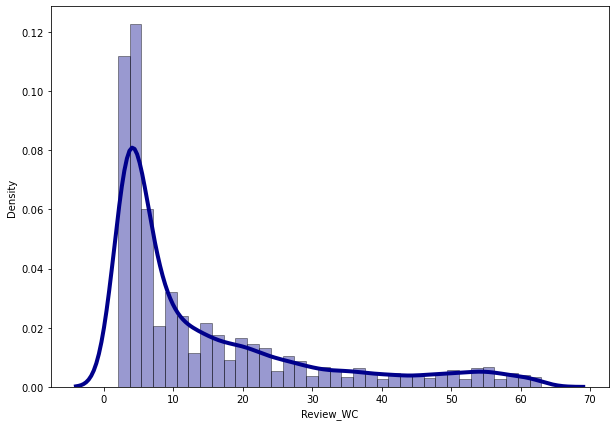

In [30]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(rr['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

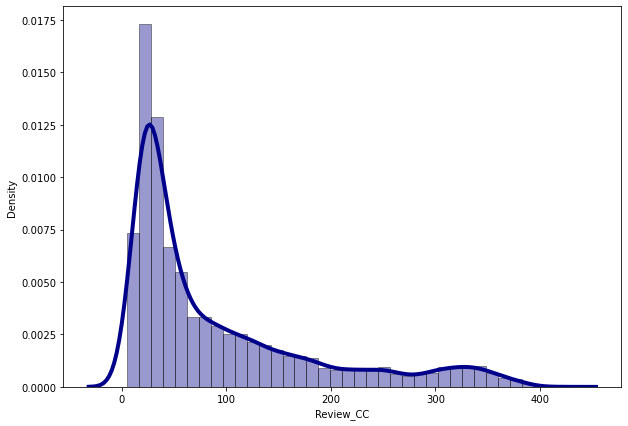

In [31]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(rr['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

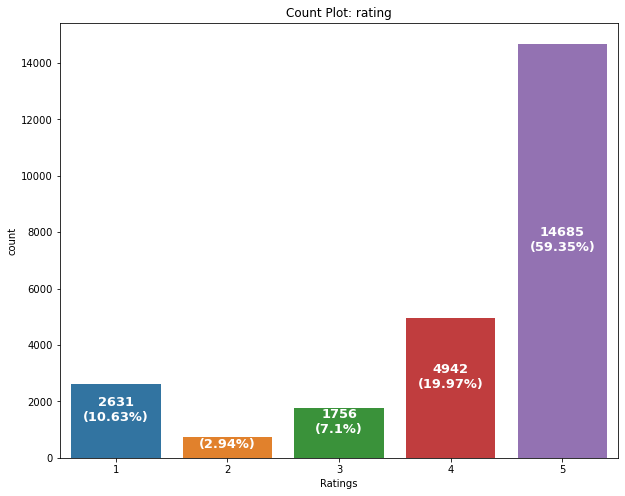

In [32]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=rr,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(rr),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

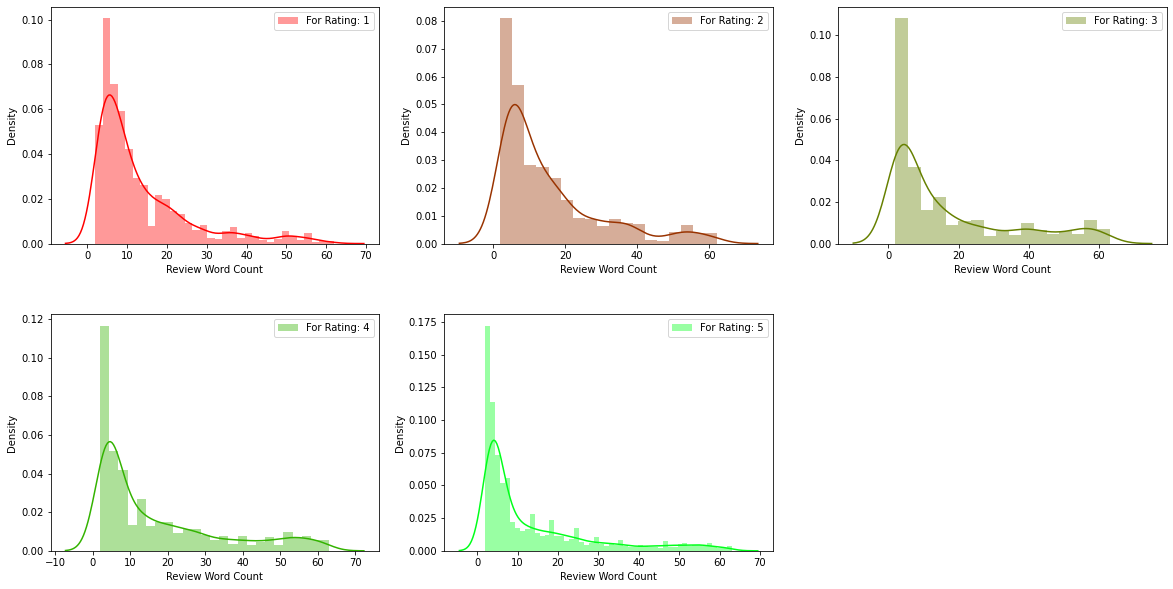

In [33]:
# Checking review word count distribution for each rating
ratings = np.sort(rr.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(rr.Review_WC[rr.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

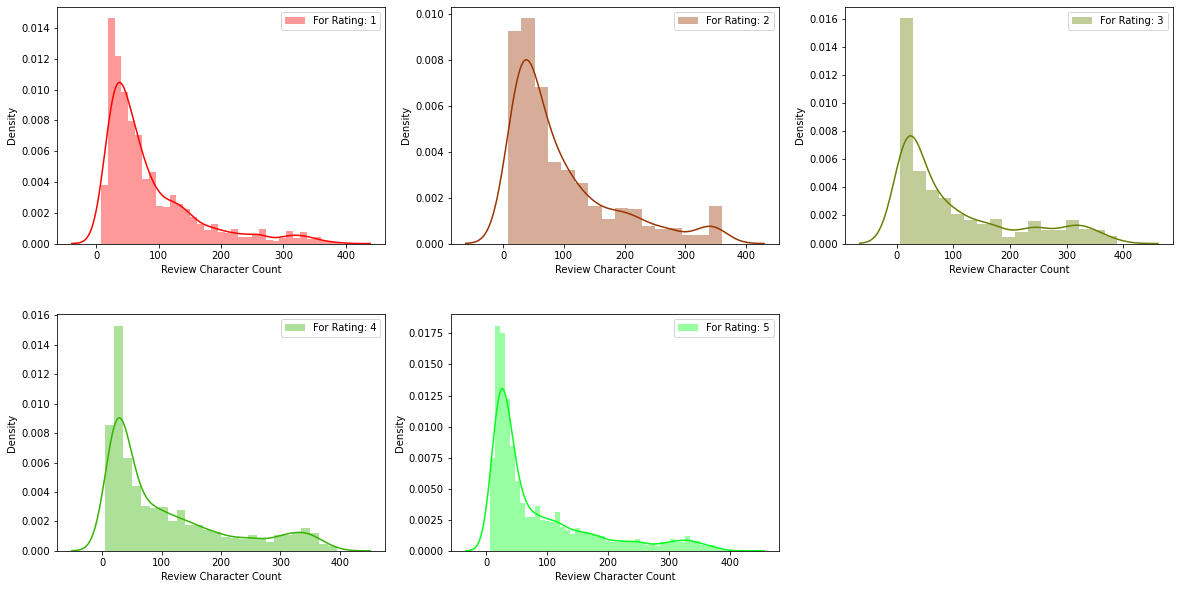

In [34]:
# Checking review character count distribution for each rating
ratings = np.sort(rr.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(rr.Review_CC[rr.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()


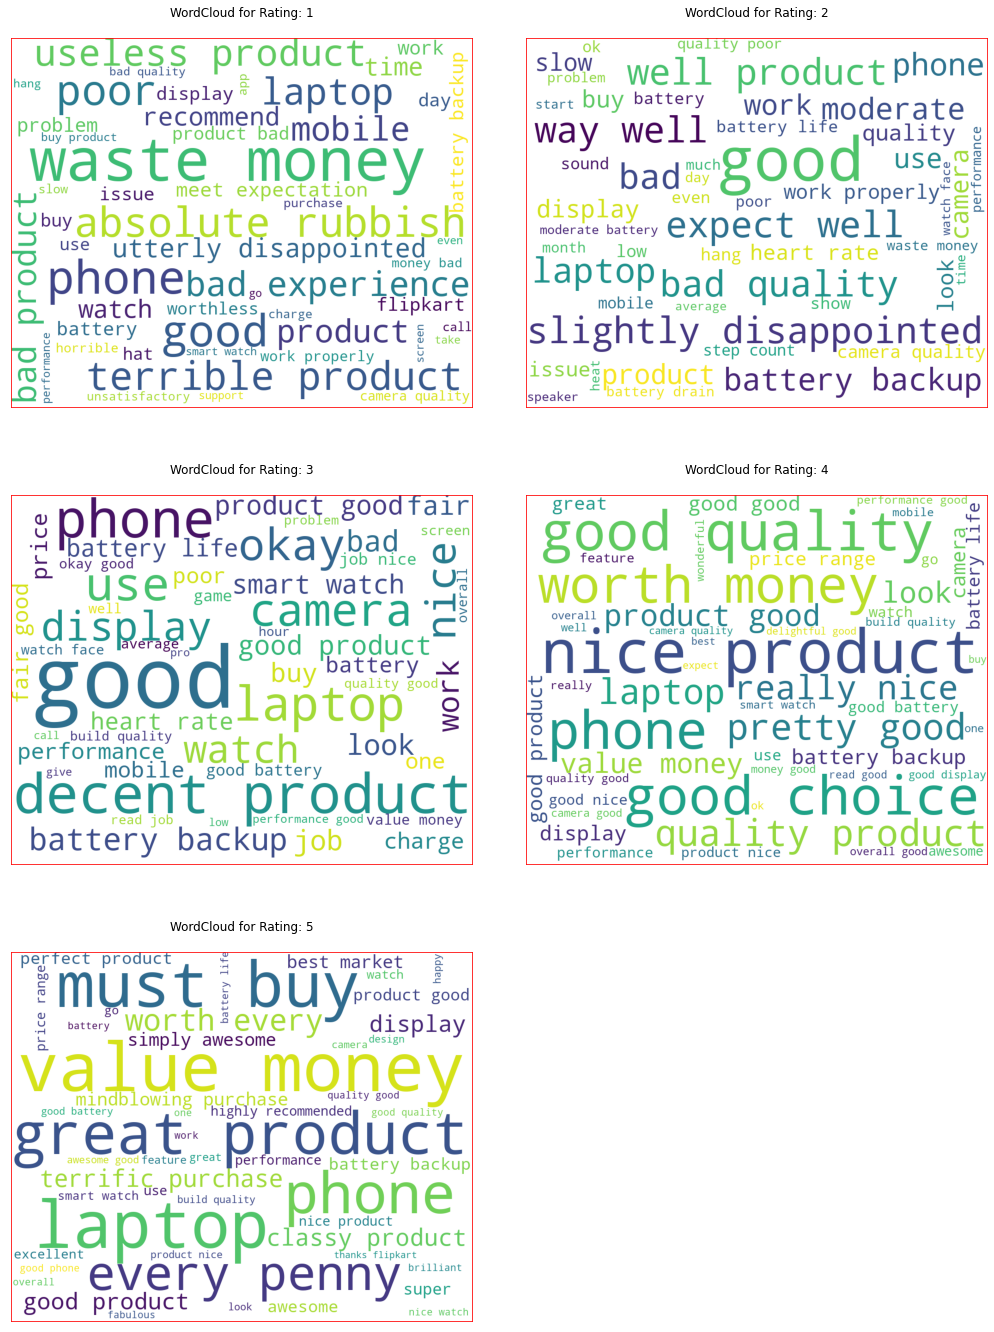

In [35]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(rr.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(rr.Review[rr.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

5    14685
4     4942
1     2631
3     1756
2      727
Name: Ratings, dtype: int64


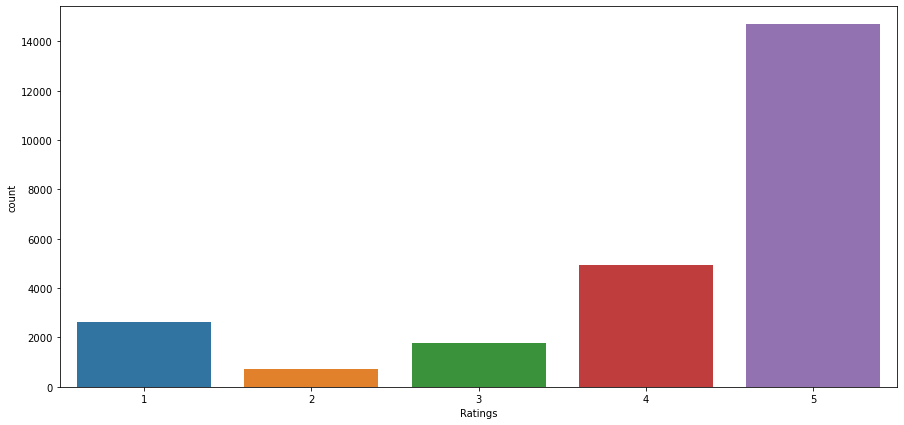

In [36]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(rr['Ratings'])
print(rr.Ratings.value_counts())
plt.show()

In [37]:
# shuffling the entire data set
rr = rr.sample(frac=1).reset_index(drop=True)
rr

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Don't waste your money,I bought this realme c31 phone it is not worki...,1,waste money buy realme c phone work properly c...,13,78
1,Best in the market!,Best 👌 👍.,5,best market best,3,16
2,Wonderful,Premium build and looks\nBudget friendly\nOver...,5,wonderful premium build look budget friendly o...,10,69
3,Key board alphabets are too light &amp; thin,very difficult to see alphabets of Keyboard in...,3,key board alphabet light amp thin difficult se...,16,98
4,Awesome,Immersive amoled display 👌👌\nBest display in t...,5,awesome immersive amoled display best display ...,26,140
...,...,...,...,...,...,...
24736,Does the job,"Some of functions needs to be upgraded, hoat p...",3,job function need upgraded hoat pro gear app w...,38,239
24737,Brilliant,Received my delivery and it was ecstatic . I h...,5,brilliant receive delivery ecstatic extremely ...,24,166
24738,Worth every penny,Premium quality watch,5,worth every penny premium quality watch,6,39
24739,Just wow!,Best laptop 💻 and value of money\n\nSmooth fun...,5,wow best laptop value money smooth function fast,8,48


In [38]:
# Select data from every ratings category
rr1 = rr[rr['Ratings']==1][0:7356]
rr2 = rr[rr['Ratings']==2][0:7356]
rr3 = rr[rr['Ratings']==3][0:7356]
rr4 = rr[rr['Ratings']==4][0:7356]
rr5 = rr[rr['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
rr = pd.concat([rr1,rr2,rr3,rr4,rr5], ignore_index=True)
rr = rr.sample(frac=1).reset_index(drop=True)
rr

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Nice product,Very good product,4,nice product good product,4,25
1,Pretty good,"It is my first apple product ,what an awesome ...",4,pretty good first apple product awesome experi...,47,301
2,Worthless,Kweekly heating when working or using..,1,worthless kweekly heat work use,5,31
3,Worst experience ever!,"Not Charging, Mic not working, charger giving ...",1,bad experience ever charge mic working charger...,14,93
4,Simply awesome,No nonsense phone.. things that r supposed to ...,5,simply awesome nonsense phone thing r suppose ...,36,224
...,...,...,...,...,...,...
17407,Does the job,At this price the watch seems like a steal dea...,3,job price watch seem like steal deal actually ...,50,290
17408,Must buy!,Nice,5,must buy nice,3,13
17409,Just okay,not up to level,3,okay level,2,10
17410,Delightful,Good Phone this price\nGood look,4,delightful good phone price good look,6,37


5    7356
4    4942
1    2631
3    1756
2     727
Name: Ratings, dtype: int64


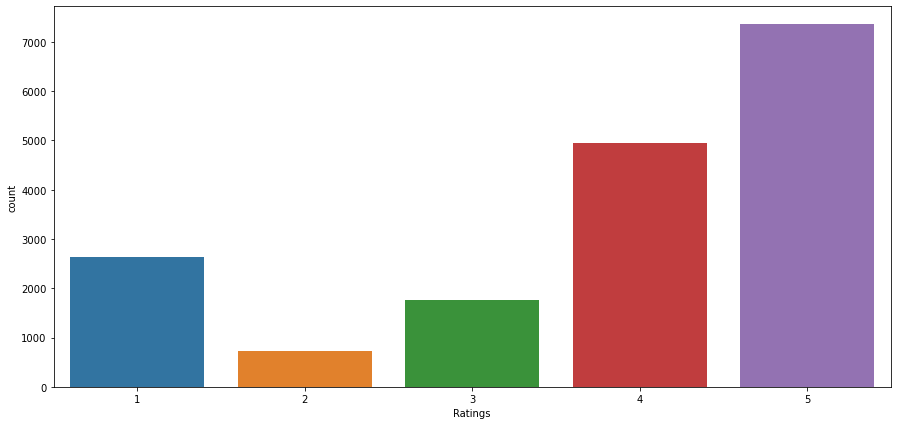

In [39]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(rr['Ratings'])
print(rr.Ratings.value_counts())
plt.show()

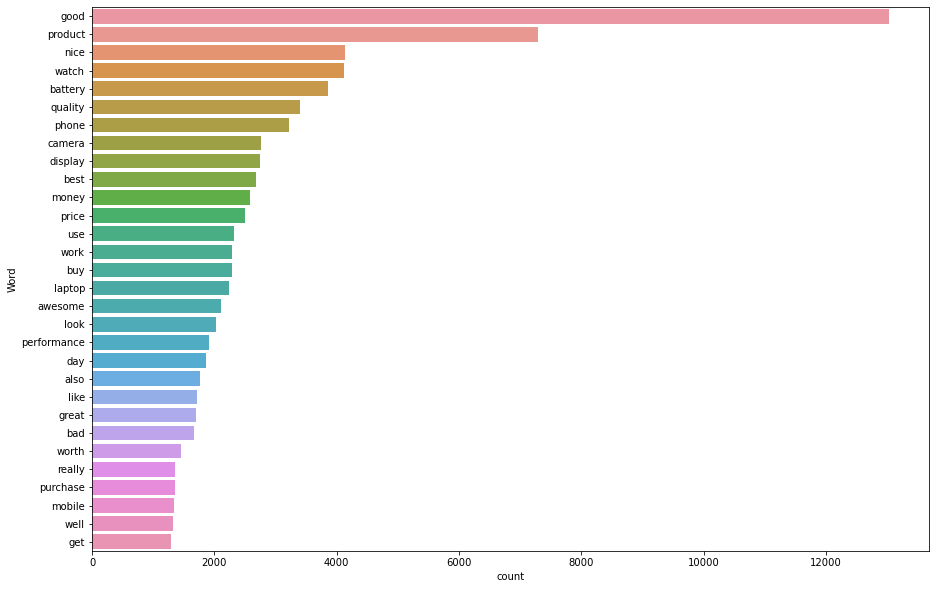

In [40]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    rt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=rt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(rr['Review'])    


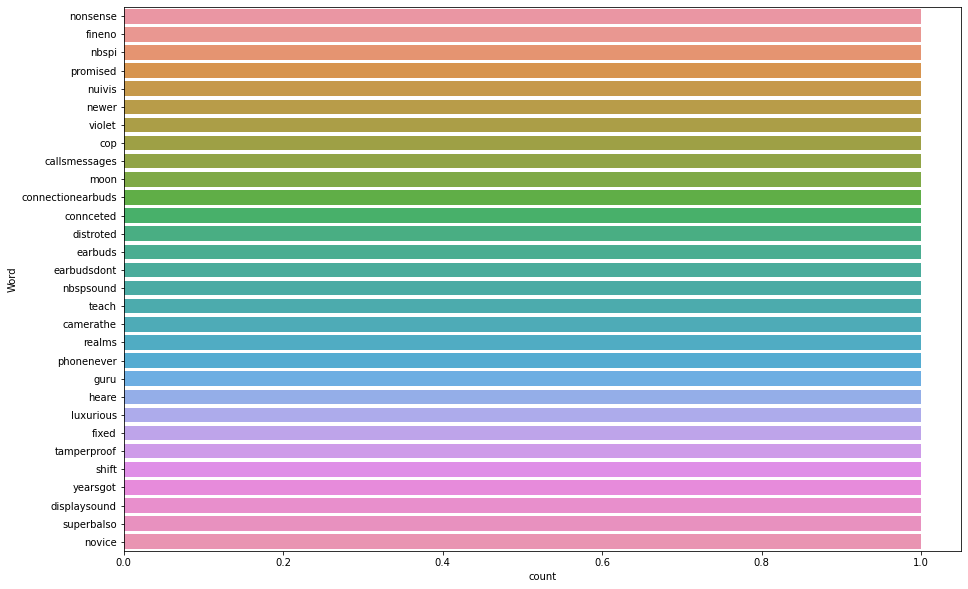

In [41]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    rt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=rt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(rr['Review'])  

In [42]:
# Separating features and labels here
x = rr['Review']
y = rr['Ratings']

In [43]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

In [44]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (12188, 150000)
x_test (5224, 150000)
y_train (12188,)
y_test (5224,)


In [45]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

In [46]:
for model in [lr,svc,bnb,mnb,sgd,rf,xgb,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 95.42496171516079
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       813
           2       0.99      0.85      0.92       222
           3       0.95      0.86      0.91       506
           4       0.95      0.95      0.95      1551
           5       0.95      0.98      0.96      2132

    accuracy                           0.95      5224
   macro avg       0.96      0.93      0.94      5224
weighted avg       0.95      0.95      0.95      5224

CONFUSION MATRIX: 
 [[ 800    0    4    2    7]
 [  17  189    5    5    6]
 [   8    2  437   27   32]
 [   5    0   11 1478   57]
 [   0    0    1   50 2081]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

In [47]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb,xgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 95.29634734665748


******************************LinearSVC******************************
Cross validation score: 96.03721571330118


******************************SGDClassifier******************************
Cross validation score: 95.89937973811166


******************************RandomForestClassifier******************************
Cross validation score: 95.60073512520103


******************************LGBMClassifier******************************
Cross validation score: 96.85848839880542


******************************XGBClassifier******************************
Cross validation score: 96.66322076728693




In [48]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 1.1min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 1.1min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 1.1min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 2.2min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 2.2min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 2.1min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 1.1min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 1.1min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 1.1min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_esti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [49]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 500,
 'n_estimators': 200}

In [50]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 94.88897396630934

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.96      0.99      0.98       813
           2       0.99      0.85      0.92       222
           3       0.92      0.87      0.89       506
           4       0.96      0.93      0.94      1551
           5       0.94      0.98      0.96      2132

    accuracy                           0.95      5224
   macro avg       0.95      0.92      0.94      5224
weighted avg       0.95      0.95      0.95      5224


CONFUSION MATRIX: 
 [[ 804    0    1    1    7]
 [  16  189    8    2    7]
 [   7    1  441   11   46]
 [   7    0   30 1435   79]
 [   2    0    1   41 2088]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

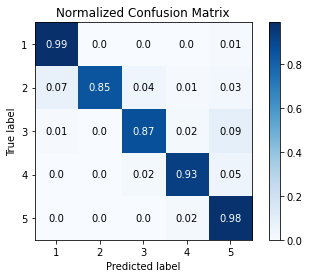

In [51]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

In [52]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

In [53]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

In [54]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,4,4
1,5,4
2,5,1
3,1,1
4,4,5
...,...,...
5219,4,5
5220,5,3
5221,5,3
5222,4,1


In [55]:
# Converting the dataframe into CSV format and saving it
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)